In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as ticker
from collections import Counter
import scipy.stats as stats
from scipy.stats import binom
from matplotlib.ticker import MultipleLocator


Instructions:
Plot the following information for your simulation based on your read.mappinginfo:
• fragment length distribution
• mutation distribution
• barplot with the number of reads in the following categories:
– all reads
– number of non-split reads (fw and rw) (non-split := the corresponding genomic
vector consists only of a single region)
– number of non-split reads with no mismatches
– number of split reads
– number of split reads with no mismatches
– number of split reads with no mismatches where all regions are at least 5 basepairs
long
readid	chr	gene	transcript	fw_regvec	rw_regvec	t_fw_regvec	t_rw_regvec	fw_mut	rw_mut



# Load Data

In [56]:
mapping_info_path = 'C:\\Users\\Simon\\IdeaProjects\\gobi\\data\\readsimulator\\analysisoutput\\read.mappinginfo'

In [57]:
mapping_info_path = '../../../../data/readsimulator/testouput/read.mappinginfo'

In [58]:
mapping_info_df = pd.read_csv(mapping_info_path, sep='\t')

/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_35311/127145500.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mapping_info_df = pd.read_csv(mapping_info_path, sep='\t')
/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_35311/127145500.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mapping_info_df = pd.read_csv(mapping_info_path, sep='\t')


In [59]:
## Fragment Length Distribution
# We can get the fragment length distribution by subtracting the start position of the read from the end position of the read. That means subtract first number from start-end in t_fw_regvec from the second number from start-end in t_rw_regvec. +1 to include the last basepair.

fragment_lengths = [
    int(rw.split('-')[1]) - int(fw.split('-')[0]) + 1
    for rw, fw in zip(mapping_info_df['t_rw_regvec'], mapping_info_df['t_fw_regvec'])
]
# Make a histogram of the fragment lengths, show the SD and mean, and a line
mean_length = np.mean(fragment_lengths)
std_length = np.std(fragment_lengths)


In [60]:
len(np.unique(fragment_lengths))

507

507

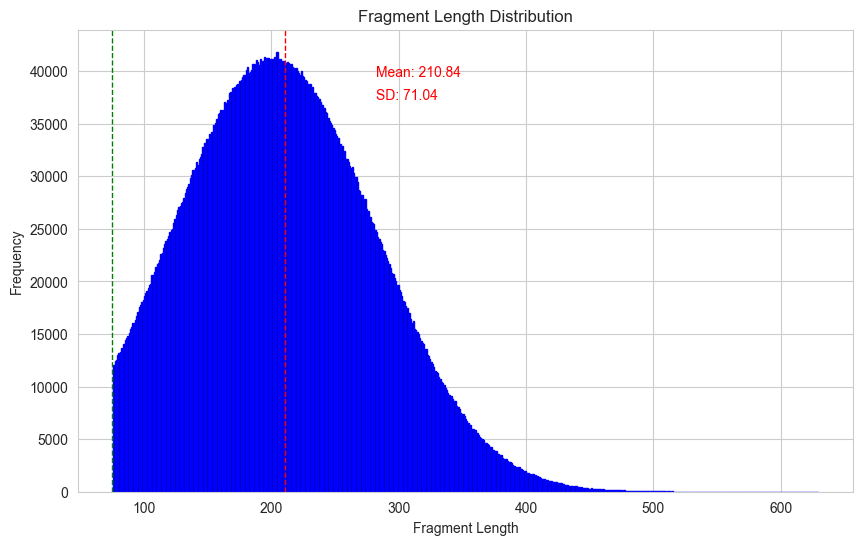

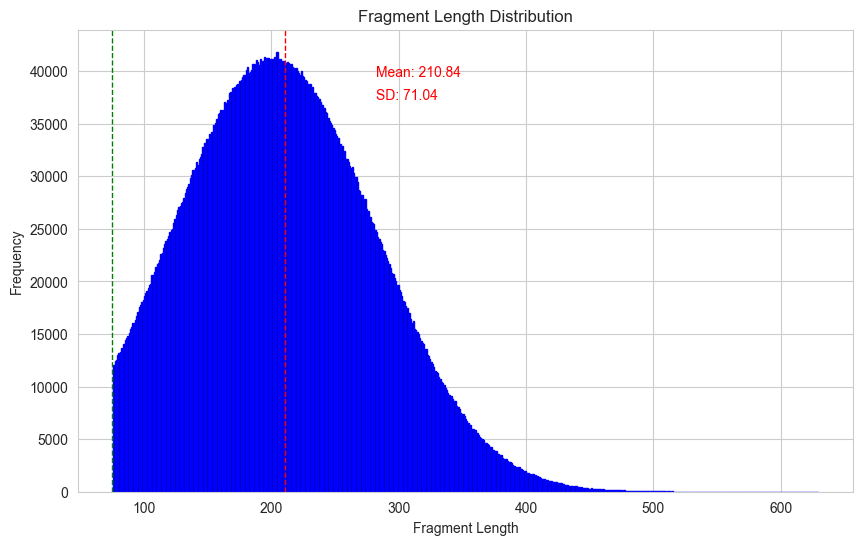

In [61]:


# Create the histogram
plt.figure(figsize=(10, 6))



plt.hist(fragment_lengths, bins=np.unique(fragment_lengths), color='darkblue', edgecolor="blue", alpha=1)


# Add a vertical line for the mean
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.axvline(75, color='green', linestyle='dashed', linewidth=1, label='Read Length')

# Add text for mean and standard deviation
plt.text(mean_length + std_length, plt.ylim()[1] * 0.9, f'Mean: {mean_length:.2f}', color='red')
plt.text(mean_length + std_length, plt.ylim()[1] * 0.85, f'SD: {std_length:.2f}', color='red')

# Add labels and title
plt.xlabel('Fragment Length')
plt.ylabel('Frequency')
plt.title('Fragment Length Distribution')

# Show the plot
plt.grid(True)
plt.savefig('simon_fragment_length_distribution.png', dpi=600)
plt.show()

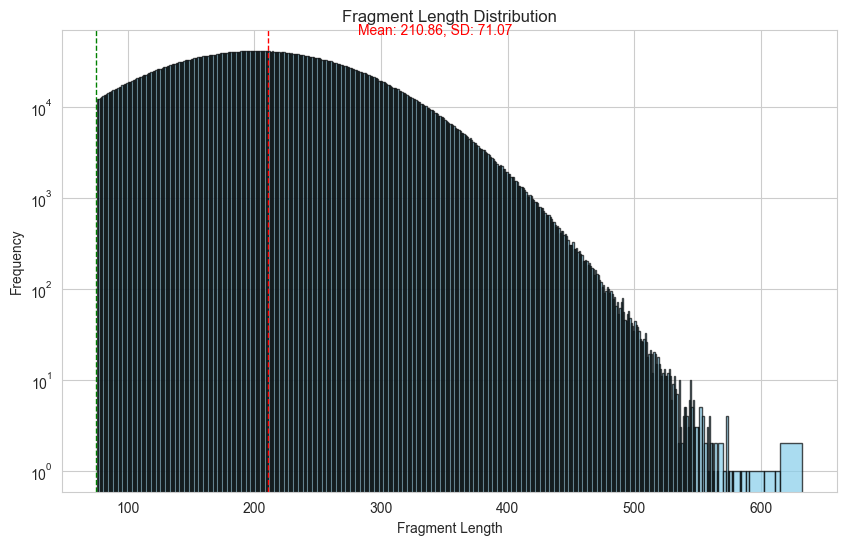

In [52]:


# Create the histogram
plt.figure(figsize=(10, 6))


plt.yscale('log')
plt.hist(fragment_lengths, bins=np.unique(fragment_lengths), color='skyblue', edgecolor='black', alpha=0.7)
# Add a vertical line for the mean
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.axvline(75, color='green', linestyle='dashed', linewidth=1, label='Read Length')

# Add text for mean and standard deviation
plt.text(mean_length + std_length, plt.ylim()[1] * 0.9, f'Mean: {mean_length:.2f}, SD: {std_length:.2f}', color='red')


# Add labels and title
plt.xlabel('Fragment Length')
plt.ylabel('Frequency')
plt.title('Fragment Length Distribution')

# Show the plot
plt.grid(True)
plt.savefig('simon_fragment_length_distribution_log.png', dpi=600)
plt.show()

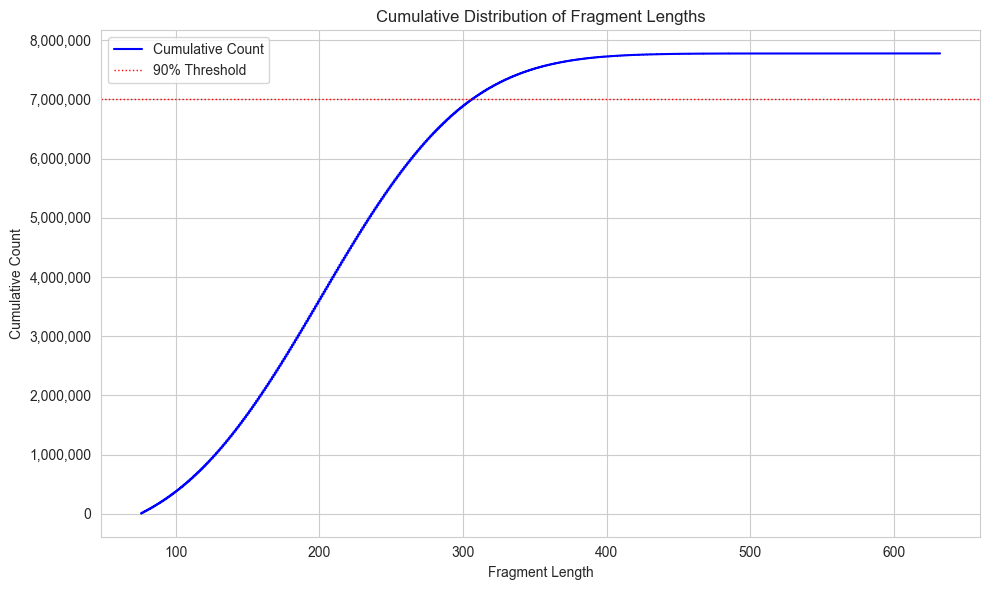

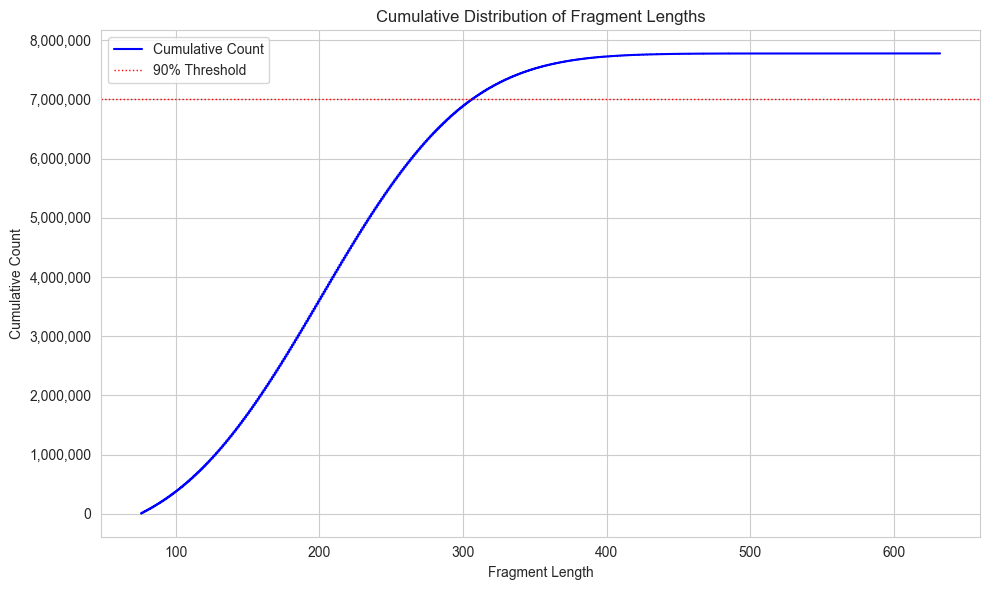

In [53]:
sorted_lengths = np.sort(fragment_lengths)  # Sort the fragment lengths
cumulative_counts = np.arange(1, len(sorted_lengths) + 1)  # Create an array of cumulative counts

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sorted_lengths, cumulative_counts, label='Cumulative Count', color='blue')

# Format the y-axis to avoid scientific notation
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add a red dotted line at 90% of the total count
ninety_percent_value = 0.9 * cumulative_counts[-1]  # 90% of the total count
ax.axhline(y=ninety_percent_value, color='red', linestyle='dotted', linewidth=1, label='90% Threshold')

# Add labels, title, and legend
ax.set_title('Cumulative Distribution of Fragment Lengths')
ax.set_xlabel('Fragment Length')
ax.set_ylabel('Cumulative Count')
ax.grid(True)
ax.legend()
plt.tight_layout()

plt.savefig('simon_cumulative_distribution_fragment_lengths.png', dpi=600)
plt.show()

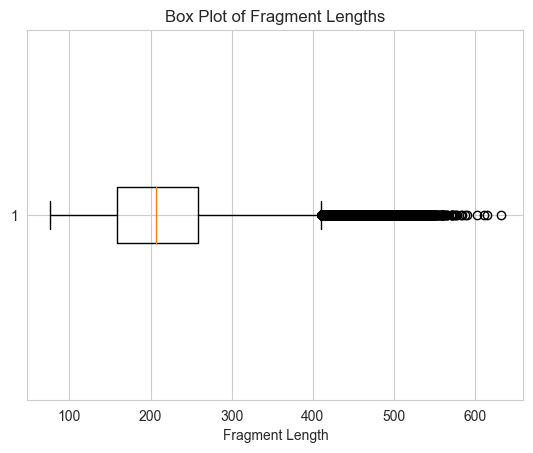

In [9]:
plt.boxplot(fragment_lengths, vert=False)
plt.title('Box Plot of Fragment Lengths')
plt.xlabel('Fragment Length')
plt.savefig('simon_boxplot_fragment_lengths.png', dpi=600)
plt.show()

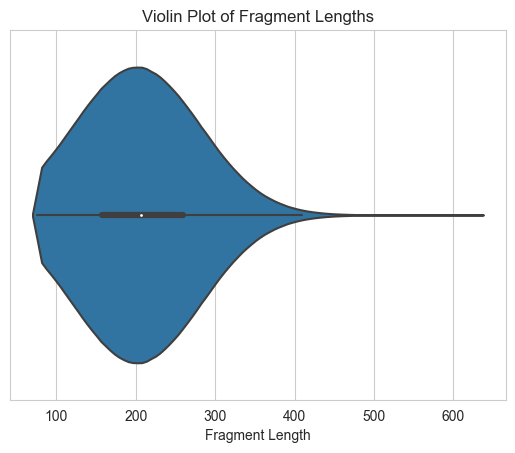

In [10]:
sns.violinplot(x=fragment_lengths)
plt.title('Violin Plot of Fragment Lengths')
plt.xlabel('Fragment Length')
plt.savefig('simon_violinplot_fragment_lengths.png', dpi=600)
plt.show()

/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_80126/1570310772.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fragment_lengths, shade=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


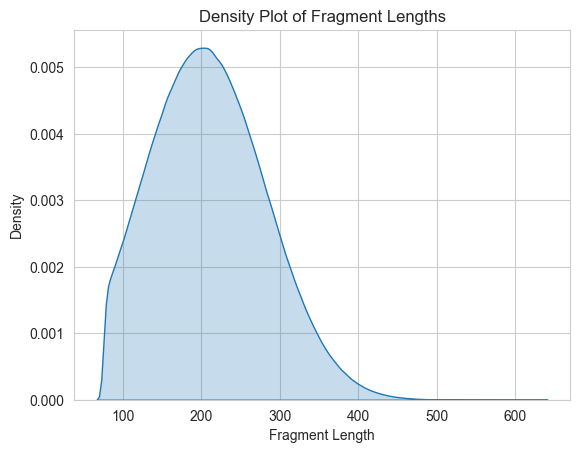

In [11]:
sns.kdeplot(fragment_lengths, shade=True)
plt.title('Density Plot of Fragment Lengths')
plt.xlabel('Fragment Length')
plt.savefig('simon_densityplot_fragment_lengths.png', dpi=600)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


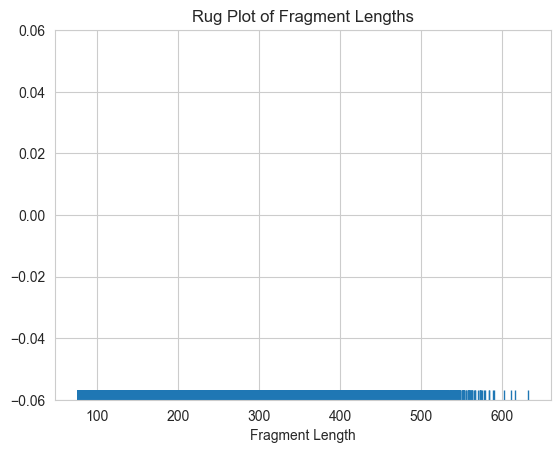

In [12]:
sns.rugplot(fragment_lengths)
plt.title('Rug Plot of Fragment Lengths')
plt.xlabel('Fragment Length')
plt.savefig('simon_rugplot_fragment_lengths.png', dpi=600)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


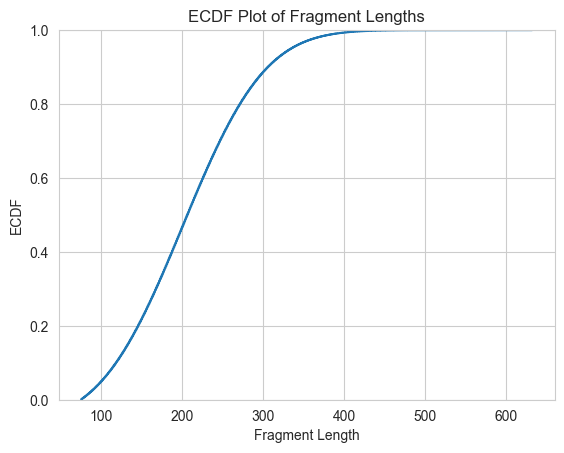

In [13]:
sns.ecdfplot(fragment_lengths)
plt.title('ECDF Plot of Fragment Lengths')
plt.xlabel('Fragment Length')
plt.ylabel('ECDF')
plt.savefig('simon_ecdfplot_fragment_lengths.png', dpi=600)
plt.show()


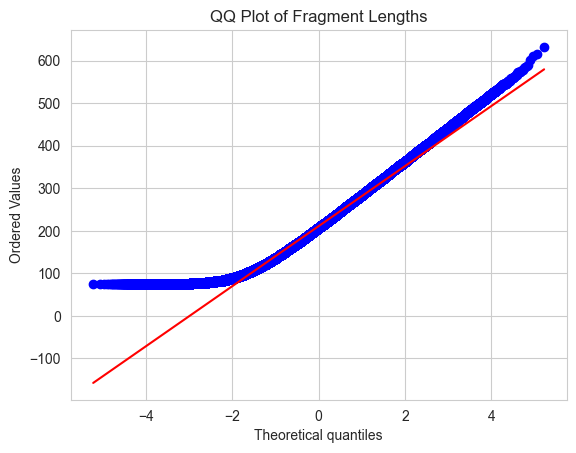

In [14]:

stats.probplot(fragment_lengths, dist="norm", plot=plt)
plt.title('QQ Plot of Fragment Lengths')
plt.savefig('simon_qqplot_fragment_lengths.png', dpi=600)
plt.show()

In [15]:
fragment_length_counts = Counter(fragment_lengths)

# Sort the counts by fragment length value
sorted_fragment_length_counts = sorted(fragment_length_counts.items())

# Print the sorted counts
for length, count in sorted_fragment_length_counts:
    print(f"Fragment Length: {length}, Count: {count}")

Fragment Length: 76, Count: 12239
Fragment Length: 77, Count: 12387
Fragment Length: 78, Count: 12651
Fragment Length: 79, Count: 12917
Fragment Length: 80, Count: 13264
Fragment Length: 81, Count: 13435
Fragment Length: 82, Count: 13558
Fragment Length: 83, Count: 13873
Fragment Length: 84, Count: 14079
Fragment Length: 85, Count: 14486
Fragment Length: 86, Count: 14720
Fragment Length: 87, Count: 15022
Fragment Length: 88, Count: 15342
Fragment Length: 89, Count: 15339
Fragment Length: 90, Count: 15701
Fragment Length: 91, Count: 15746
Fragment Length: 92, Count: 16263
Fragment Length: 93, Count: 16703
Fragment Length: 94, Count: 16678
Fragment Length: 95, Count: 17383
Fragment Length: 96, Count: 17407
Fragment Length: 97, Count: 17768
Fragment Length: 98, Count: 17910
Fragment Length: 99, Count: 18200
Fragment Length: 100, Count: 18585
Fragment Length: 101, Count: 18698
Fragment Length: 102, Count: 19022
Fragment Length: 103, Count: 19329
Fragment Length: 104, Count: 19730
Fragment 

In [16]:
# Count the number of mutations in each row for fw_mut and rw_mut
fw_mutation_counts = [len(fw.split(',')) if isinstance(fw, str) and fw else 0 for fw in mapping_info_df['fw_mut']]
rw_mutation_counts = [len(rw.split(',')) if isinstance(rw, str) and rw else 0 for rw in mapping_info_df['rw_mut']]
mutation_counts = fw_mutation_counts + rw_mutation_counts

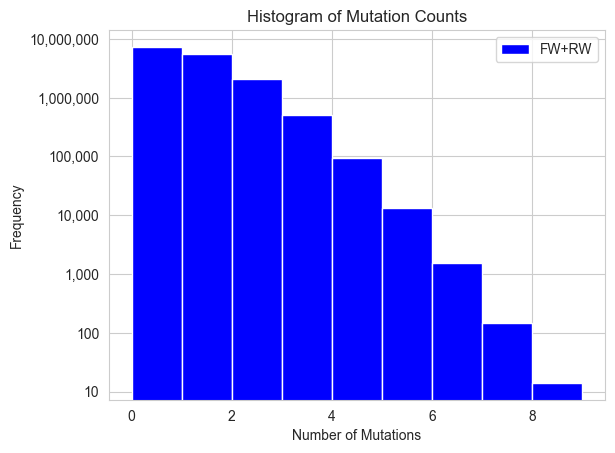

In [17]:
# TODO: Do a CDF of the mutation counts, overlay binomial distribution
plt.hist(mutation_counts, bins=np.unique(mutation_counts), label='FW+RW', color='blue')
plt.xlabel('Number of Mutations')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Histogram of Mutation Counts')
plt.legend()

# Change y-axis to not be in scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('simon_histogram_mutation_counts_log.png', dpi=600)

plt.show()

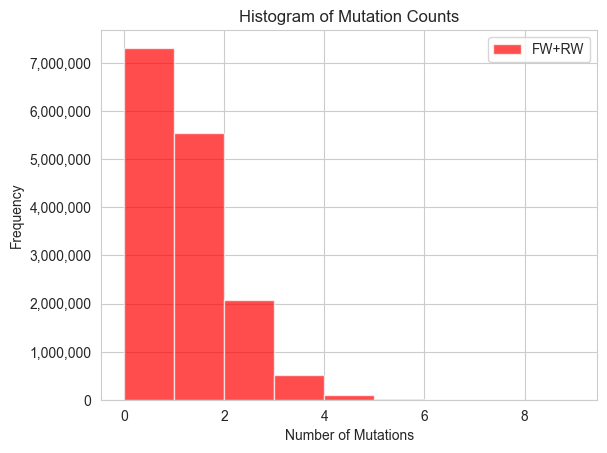

In [18]:
plt.hist(mutation_counts, bins=np.unique(mutation_counts), alpha=0.7, label='FW+RW', color='red')
plt.xlabel('Number of Mutations')
plt.ylabel('Frequency')
plt.title('Histogram of Mutation Counts')
plt.legend()

# Change y-axis to not be in scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('simon_histogram_mutation_counts.png', dpi=600)
plt.show()

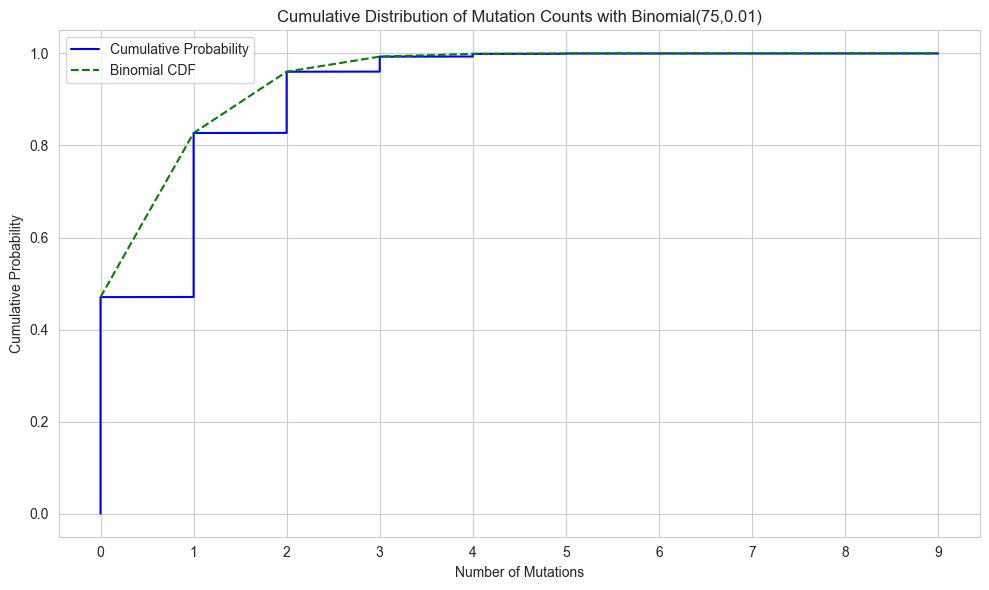

In [19]:

# Sort the mutation counts
sorted_mutation_counts = np.sort(mutation_counts)
cumulative_mutation_counts = np.arange(1, len(sorted_mutation_counts) + 1)



# Normalize cumulative counts to get probabilities
cumulative_probabilities = cumulative_mutation_counts / len(mutation_counts)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sorted_mutation_counts, cumulative_probabilities, label='Cumulative Probability', color='blue')


# Add the CDF of the binomial distribution
n = 75
p = 0.01
x = np.arange(0, max(sorted_mutation_counts) + 1)
binom_cdf = binom.cdf(x, n, p)
ax.plot(x, binom_cdf, label='Binomial CDF', color='green', linestyle='dashed')

# Add labels, title, and legend
ax.set_title('Cumulative Distribution of Mutation Counts with Binomial(75,0.01)')
ax.set_xlabel('Number of Mutations')
ax.set_ylabel('Cumulative Probability')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.grid(True)
ax.legend()
plt.tight_layout()

# Show the plot
plt.savefig("simon_cumulative_distribution_mutation_counts.png", dpi=600)
plt.show()

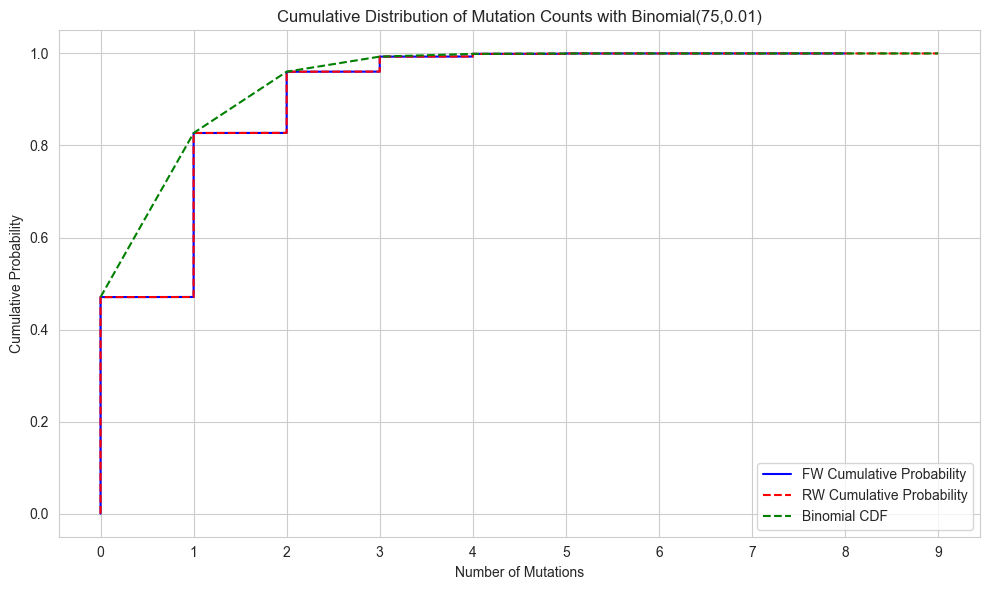

In [20]:
# Sort the mutation counts for fw and rw
sorted_fw_mutation_counts = np.sort(fw_mutation_counts)
sorted_rw_mutation_counts = np.sort(rw_mutation_counts)

# Calculate cumulative counts
cumulative_fw_mutation_counts = np.arange(1, len(sorted_fw_mutation_counts) + 1)
cumulative_rw_mutation_counts = np.arange(1, len(sorted_rw_mutation_counts) + 1)

# Normalize cumulative counts to get probabilities
cumulative_fw_probabilities = cumulative_fw_mutation_counts / len(fw_mutation_counts)
cumulative_rw_probabilities = cumulative_rw_mutation_counts / len(rw_mutation_counts)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sorted_fw_mutation_counts, cumulative_fw_probabilities, label='FW Cumulative Probability', color='blue')
ax.plot(sorted_rw_mutation_counts, cumulative_rw_probabilities, label='RW Cumulative Probability', color='red', linestyle='dashed')

# Add the CDF of the binomial distribution
n = 75
p = 0.01
x = np.arange(0, max(max(sorted_fw_mutation_counts), max(sorted_rw_mutation_counts)) + 1)
binom_cdf = binom.cdf(x, n, p)
ax.plot(x, binom_cdf, label='Binomial CDF', color='green', linestyle='dashed')

# Add labels, title, and legend
ax.set_title('Cumulative Distribution of Mutation Counts with Binomial(75,0.01)')
ax.set_xlabel('Number of Mutations')
ax.set_ylabel('Cumulative Probability')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.grid(True)
ax.legend()
plt.tight_layout()

# Show the plot
plt.savefig("simon_cumulative_distribution_mutation_counts_FWRW.png", dpi=600)
plt.show()

In [63]:
# Function to check if all regions have a length >= 5
def check_region_length(regvec):
    # Split the regvec by '|'
    regions = regvec.split('|')

    # Check each region
    for region in regions:
        start, end = region.split('-')
        start = int(start)
        end = int(end)

        # Check if the length of the region is at least 5
        if end - start < 5:
            return False

    return True

In [64]:
# Barplot
# – all reads
# – number of non-split reads (fw and rw) (non-split := the corresponding genomic
# vector consists only of a single region), we can check if there is a | in the string
# – number of non-split reads with no mismatches
# – number of split reads
# – number of split reads with no mismatches
# – number of split reads with no mismatches where all regions are at least 5 basepairs
# long


all_reads = len(mapping_info_df)

# Number of non-split reads (fw and rw)
non_split_read_fw = len([fw for fw in mapping_info_df['fw_regvec'] if '|' not in fw])
non_split_read_rw = len([rw for rw in mapping_info_df['rw_regvec'] if '|' not in rw])

# Number of non-split reads with no mismatches
non_split_read_fw_no_mismatches = len(
    mapping_info_df[~mapping_info_df['fw_regvec'].str.contains(r'\|', na=False)& pd.isna(mapping_info_df['fw_mut'])]
)

non_split_read_rw_no_mismatches = len(
    mapping_info_df[~mapping_info_df['rw_regvec'].str.contains(r'\|', na=False) & pd.isna(mapping_info_df['rw_mut'])]
)

# Number of split reads
split_read_fw = len([fw for fw in mapping_info_df['fw_regvec'] if '|' in fw])
split_read_rw = len([rw for rw in mapping_info_df['rw_regvec'] if '|' in rw])

# Number of split reads with no mismatches
split_read_fw_no_mismatches = len(
    mapping_info_df[mapping_info_df['fw_regvec'].str.contains(r'\|', na=False) & pd.isna(mapping_info_df['fw_mut'])]
)
split_read_rw_no_mismatches = len(
    mapping_info_df[mapping_info_df['rw_regvec'].str.contains(r'\|', na=False) & pd.isna(mapping_info_df['rw_mut'])]
)

# Number of split reads with no mismatches where all regions are at least 5 basepairs long
split_read_fw_valid_length = len(
    mapping_info_df[
        mapping_info_df['fw_regvec'].str.contains(r'\|', na=False) &
        mapping_info_df['fw_regvec'].apply(check_region_length) &
        pd.isna(mapping_info_df['fw_mut'])
        ]
)

split_read_rw_valid_length = len(
    mapping_info_df[
        mapping_info_df['rw_regvec'].str.contains(r'\|', na=False) &
        mapping_info_df['rw_regvec'].apply(check_region_length) &
        pd.isna(mapping_info_df['rw_mut'])
        ]
)


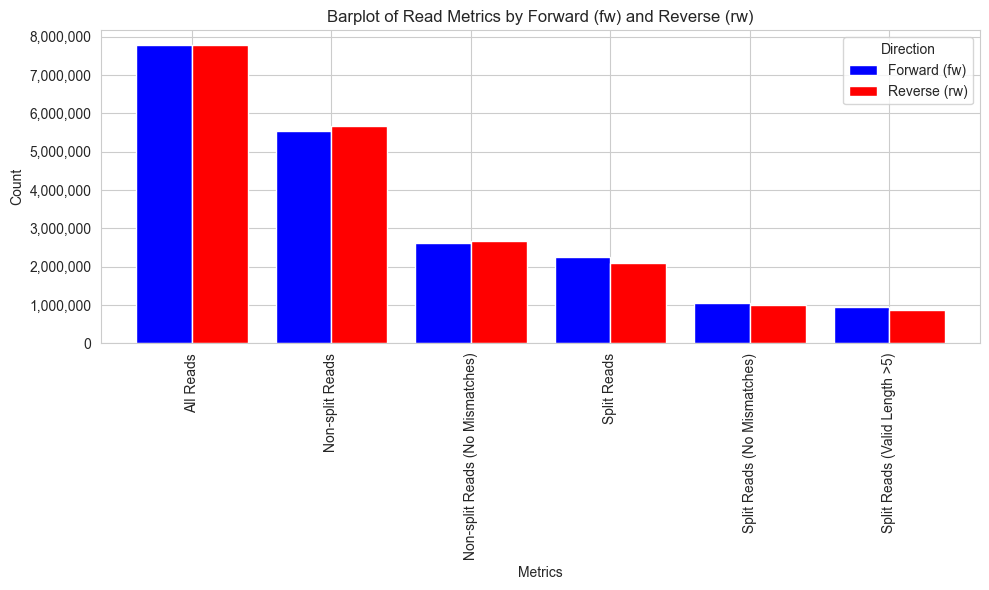

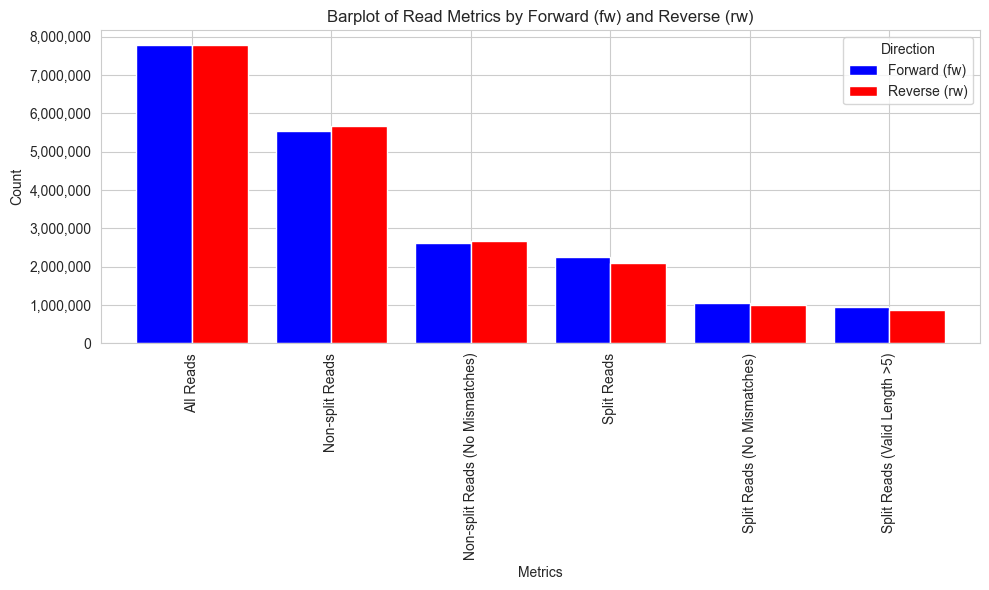

In [65]:
# TODO Label the points
metrics = [
    ('All Reads', all_reads, all_reads),  # For 'All Reads', both fw and rw should be equal
    ('Non-split Reads', non_split_read_fw, non_split_read_rw),
    ('Non-split Reads (No Mismatches)', non_split_read_fw_no_mismatches, non_split_read_rw_no_mismatches),
    ('Split Reads', split_read_fw, split_read_rw),
    ('Split Reads (No Mismatches)', split_read_fw_no_mismatches, split_read_rw_no_mismatches),
    ('Split Reads (Valid Length >5)', split_read_fw_valid_length, split_read_rw_valid_length)
]

df = pd.DataFrame(metrics, columns=['Metric', 'fw', 'rw'])

fig, ax = plt.subplots(figsize=(10, 6))

df.set_index('Metric').plot(kind='bar', ax=ax, color=['blue', 'red'], width=0.8)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Metrics')
ax.set_ylabel('Count')
ax.set_title('Barplot of Read Metrics by Forward (fw) and Reverse (rw)')
ax.legend(title='Direction', labels=['Forward (fw)', 'Reverse (rw)'], loc='upper right')

plt.tight_layout()
plt.savefig('simon_barplot_read_metrics.png', dpi=600)
plt.show()


In [24]:
# Distribution of what position the mutations are in
# Extract mutation positions for fw and rw
fw_mutation_positions = []
rw_mutation_positions = []

for fw_mut in mapping_info_df['fw_mut']:
    if isinstance(fw_mut, str) and fw_mut:
        fw_mutation_positions.extend(map(int, fw_mut.split(',')))

for rw_mut in mapping_info_df['rw_mut']:
    if isinstance(rw_mut, str) and rw_mut:
        rw_mutation_positions.extend(map(int, rw_mut.split(',')))



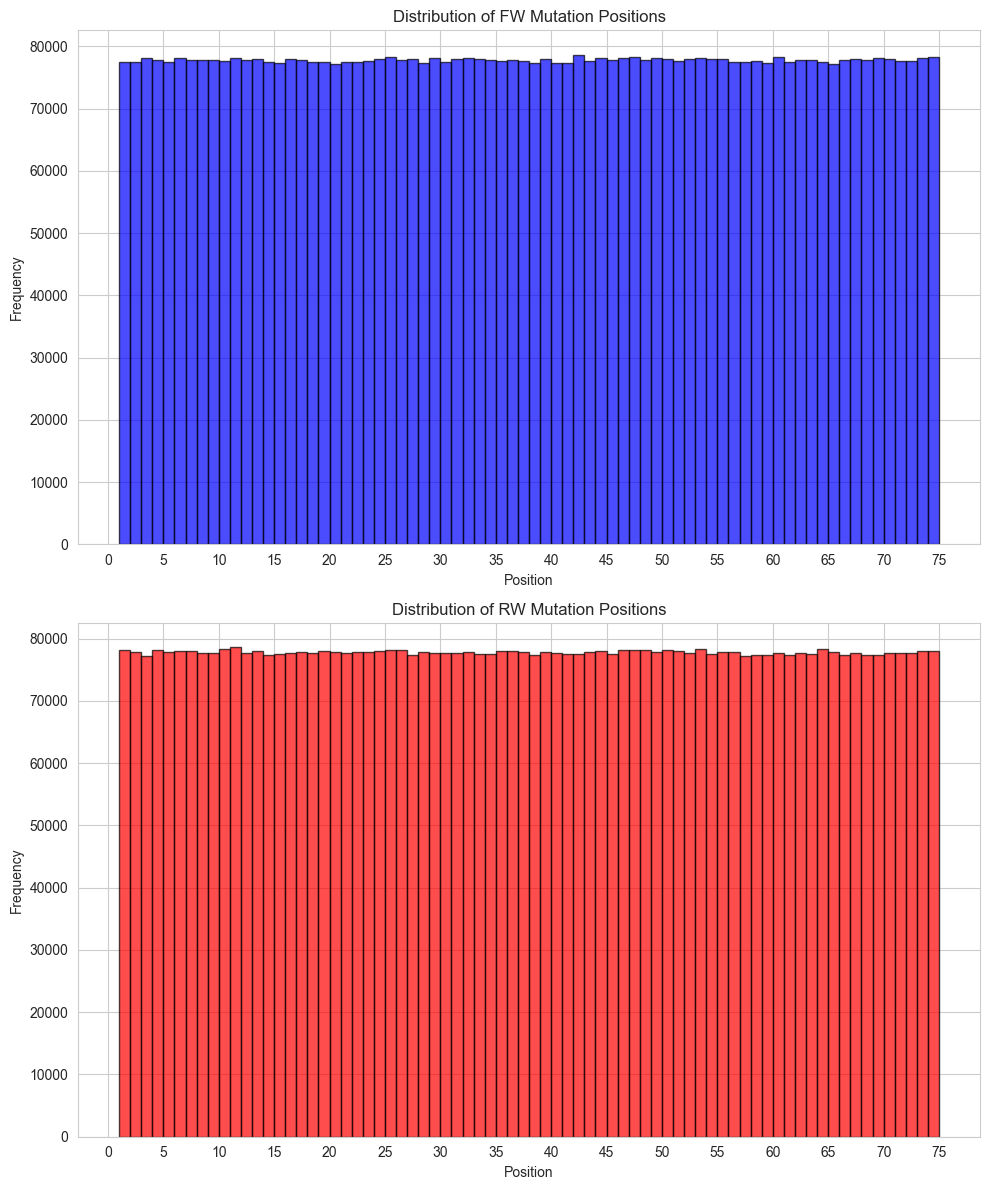

In [25]:


# Create histograms for fw and rw mutation positions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# FW mutation positions histogram
ax1.hist(fw_mutation_positions, bins=np.unique(fw_mutation_positions)+1, color='blue', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of FW Mutation Positions')
ax1.set_xlabel('Position')
ax1.set_ylabel('Frequency')
ax1.grid(True)
ax1.xaxis.set_major_locator(MultipleLocator(5))  # Set x-axis ticks to step by 5

# RW mutation positions histogram
ax2.hist(rw_mutation_positions, bins=np.unique(rw_mutation_positions)+1, color='red', edgecolor='black', alpha=0.7)
ax2.set_title('Distribution of RW Mutation Positions')
ax2.set_xlabel('Position')
ax2.set_ylabel('Frequency')
ax2.grid(True)
ax2.xaxis.set_major_locator(MultipleLocator(5))  # Set x-axis ticks to step by 5


plt.tight_layout()
plt.savefig('simon_histogram_mutation_positions.png', dpi=600)
plt.show()

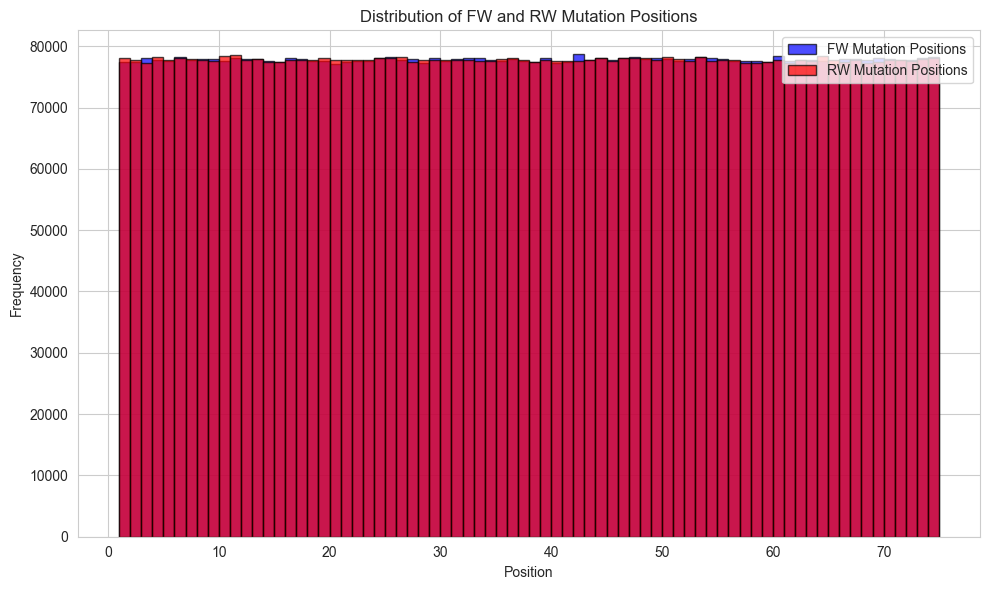

In [26]:
# Create a combined histogram for fw and rw mutation positions
fig, ax = plt.subplots(figsize=(10, 6))

# FW mutation positions histogram
ax.hist(fw_mutation_positions, bins=np.unique(fw_mutation_positions)+1, color='blue', edgecolor='black', alpha=0.7, label='FW Mutation Positions')

# RW mutation positions histogram
ax.hist(rw_mutation_positions, bins=np.unique(rw_mutation_positions)+1, color='red', edgecolor='black', alpha=0.7, label='RW Mutation Positions')

# Add labels, title, and legend
ax.set_title('Distribution of FW and RW Mutation Positions')
ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.savefig('simon_histogram_mutation_positions_combined.png', dpi=600)
plt.show()

In [12]:
# Analyze the fragment starting position
fragment_starts = [int(fw.split('-')[0] )for fw in mapping_info_df["t_fw_regvec"]]





In [44]:
mapping_info_df

,readid,chr,gene,transcript,fw_regvec,rw_regvec,t_fw_regvec,t_rw_regvec,fw_mut,rw_mut
0,0,9,ENSG00000241978,ENST00000495980,112930748-112930823,112930785-112930860,406-481,443-518,"26,44",NaN
1,1,9,ENSG00000241978,ENST00000495980,112918684-112918759,112930729-112930804,243-318,387-462,"0,64,33","59,46"
2,2,9,ENSG00000241978,ENST00000495980,112918667-112918742,112930820-112930895,226-301,478-553,51,42
3,3,9,ENSG00000241978,ENST00000495980,112810993-112811068,112918689-112918764,15-90,248-323,12,NaN
4,4,9,ENSG00000241978,ENST00000495980,112811119-112811136|112918599-112918657,112918647-112918722,141-216,206-281,35,NaN
...,...,...,...,...,...,...,...,...,...,...
7777495,7777495,12,ENSG00000180116,ENST00000324616,40114733-40114808,40115007-40115082,1792-1867,2066-2141,NaN,NaN
7777496,7777496,12,ENSG00000180116,ENST00000324616,40076655-40076730,40076723-40076798,1082-1157,1150-1225,"24,31",NaN
7777497,7777497,12,ENSG00000180116,ENST00000324616,40037622-40037697,40040258-40040264|40040642-40040691|40041594-4...,258-333,483-558,NaN,"37,38,25"
7777498,7777498,12,ENSG00000180116,ENST00000324616,40037695-40037720|40040131-40040181,40040186-40040261,331-406,411-486,62,NaN
